In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/xeven-solutions/prophet

/content/drive/MyDrive/xeven-solutions/prophet


In [ ]:
# !git  clone https://github.com/facebook/prophet.git

In [ ]:
%cd prophet/python

/content/drive/MyDrive/xeven-solutions/prophet/prophet/python


In [ ]:
# !python -m pip install -e

In [ ]:
# %load_ext rpy2.ipython
# %matplotlib inline

from prophet import Prophet
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import logging
import warnings

# logging.getLogger('prophet').setLevel(logging.ERROR)
# logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
# warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df = df.loc[:180,]  # Limit to first six months
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=60)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/clg8tpts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/ow6a_zky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6618', 'data', 'file=/tmp/tmphtfih07z/clg8tpts.json', 'init=/tmp/tmphtfih07z/ow6a_zky.json', 'output', 'file=/tmp/tmphtfih07z/prophet_modelrzgvs9v5/prophet_model-20241021124634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:46:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/x286ddyn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/lwkwp5_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93004', 'data', 'file=/tmp/tmphtfih07z/x286ddyn.json', 'init=/tmp/tmphtfih07z/lwkwp5_u.json', 'output', 'file=/tmp/tmphtfih07z/prophet_modelvt2wy8zt/prophet_model-20241021124701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:47:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:47:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
236,2008-08-09,6.563946,5.484150,7.672600
237,2008-08-10,6.963252,5.900936,8.048945
238,2008-08-11,7.346035,6.196979,8.446375
239,2008-08-12,6.978519,5.782714,8.084418
240,2008-08-13,6.889080,5.711090,8.002551


In [ ]:
m = Prophet(mcmc_samples=300)
forecast = m.fit(df, show_progress=False).predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/rasungkt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/ka4lbyft.json
12:47:15 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=41449', 'data', 'file=/tmp/tmphtfih07z/rasungkt.json', 'init=/tmp/tmphtfih07z/ka4lbyft.json', 'output', 'file=/tmp/tmphtfih07z/prophet_modelliqizx4n/prophet_model-20241021124715_1.csv', 'method=sample', 'num_samples=150', 'num_warmup=150', 'algorithm=hmc', 'a

,ds,yhat,yhat_lower,yhat_upper
236,2008-08-09,6.329898,5.140818,7.517498
237,2008-08-10,6.728692,5.522619,7.928127
238,2008-08-11,7.103525,5.903053,8.337110
239,2008-08-12,6.731105,5.512212,7.883205
240,2008-08-13,6.646900,5.426367,7.917547


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/qc3_58dj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/yhdpazyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19228', 'data', 'file=/tmp/tmphtfih07z/qc3_58dj.json', 'init=/tmp/tmphtfih07z/yhdpazyk.json', 'output', 'file=/tmp/tmphtfih07z/prophet_modelh1ps3h8i/prophet_model-20241021125422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:54:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:54:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


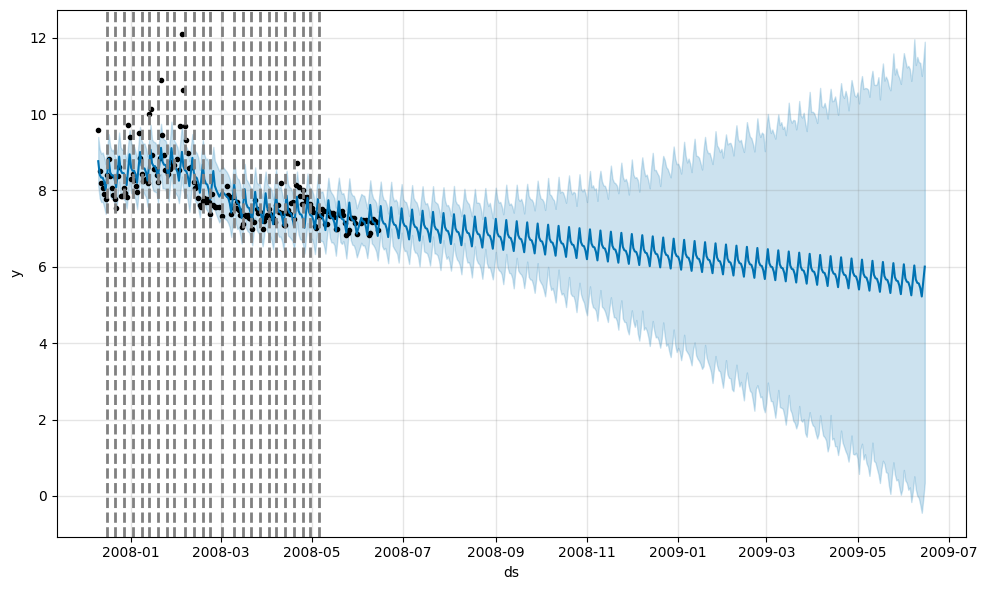

In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=366)
forecast = m.predict(future)
fig = m.plot(forecast)
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

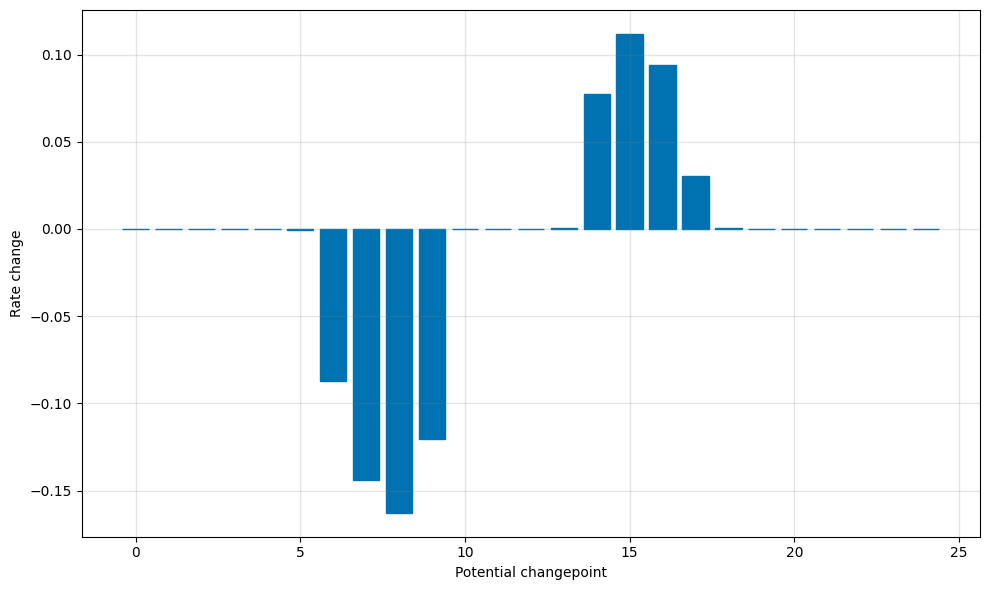

In [ ]:
deltas = m.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

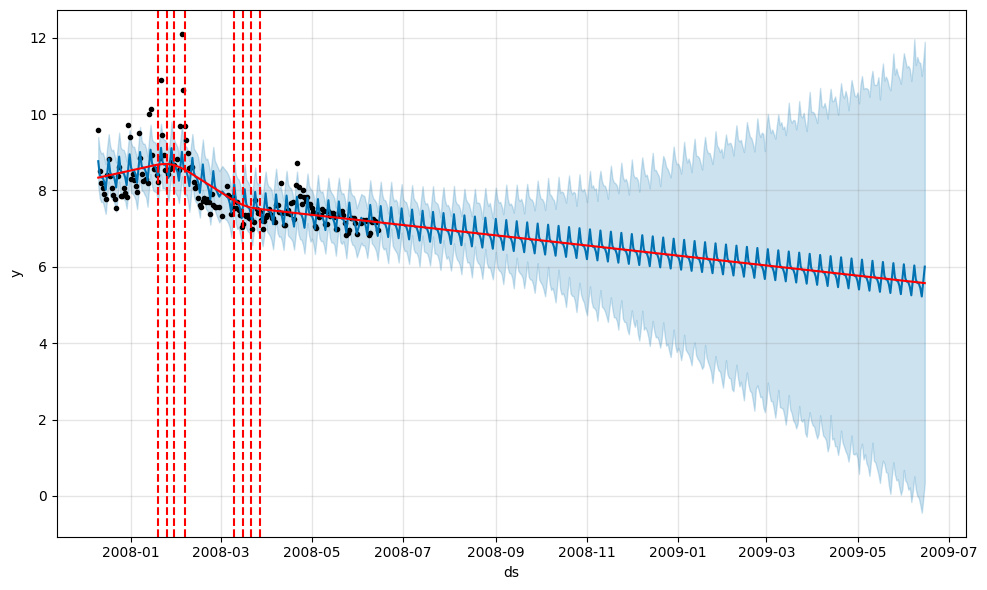

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/5vcc4zr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/qs744ci1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20982', 'data', 'file=/tmp/tmphtfih07z/5vcc4zr5.json', 'init=/tmp/tmphtfih07z/qs744ci1.json', 'output', 'file=/tmp/tmphtfih07z/prophet_model4uao8cft/prophet_model-20241021125649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:56:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:56:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


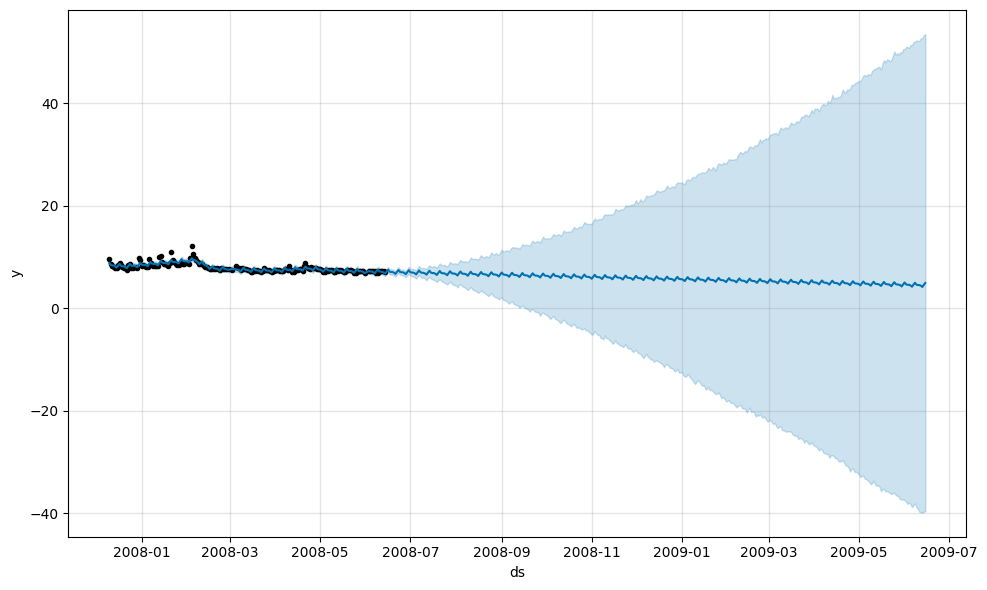

In [ ]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/d9fem9cj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/ah4o3v78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32319', 'data', 'file=/tmp/tmphtfih07z/d9fem9cj.json', 'init=/tmp/tmphtfih07z/ah4o3v78.json', 'output', 'file=/tmp/tmphtfih07z/prophet_modelk5m2uk2n/prophet_model-20241021131944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


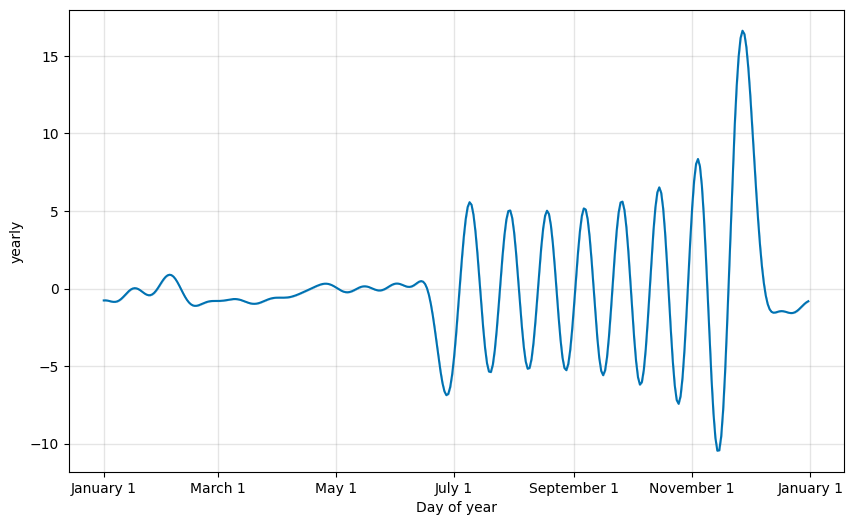

In [ ]:
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/zth_xrfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/2c3l8sc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68018', 'data', 'file=/tmp/tmphtfih07z/zth_xrfp.json', 'init=/tmp/tmphtfih07z/2c3l8sc_.json', 'output', 'file=/tmp/tmphtfih07z/prophet_model2tl6ynm1/prophet_model-20241021132014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:20:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:20:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


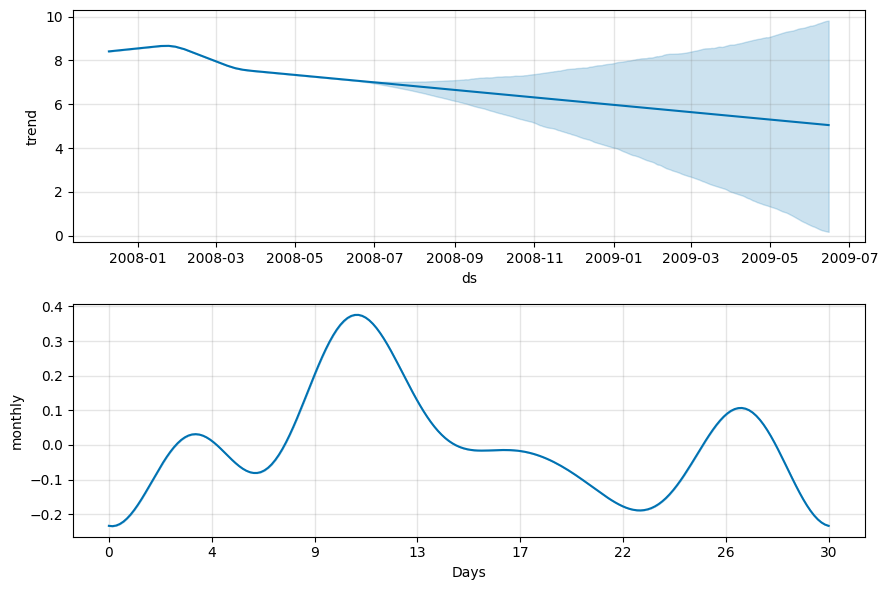

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/15o8156p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/kq4yfx5s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96839', 'data', 'file=/tmp/tmphtfih07z/15o8156p.json', 'init=/tmp/tmphtfih07z/kq4yfx5s.json', 'output', 'file=/tmp/tmphtfih07z/prophet_modelb3hwgp4q/prophet_model-20241021132214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


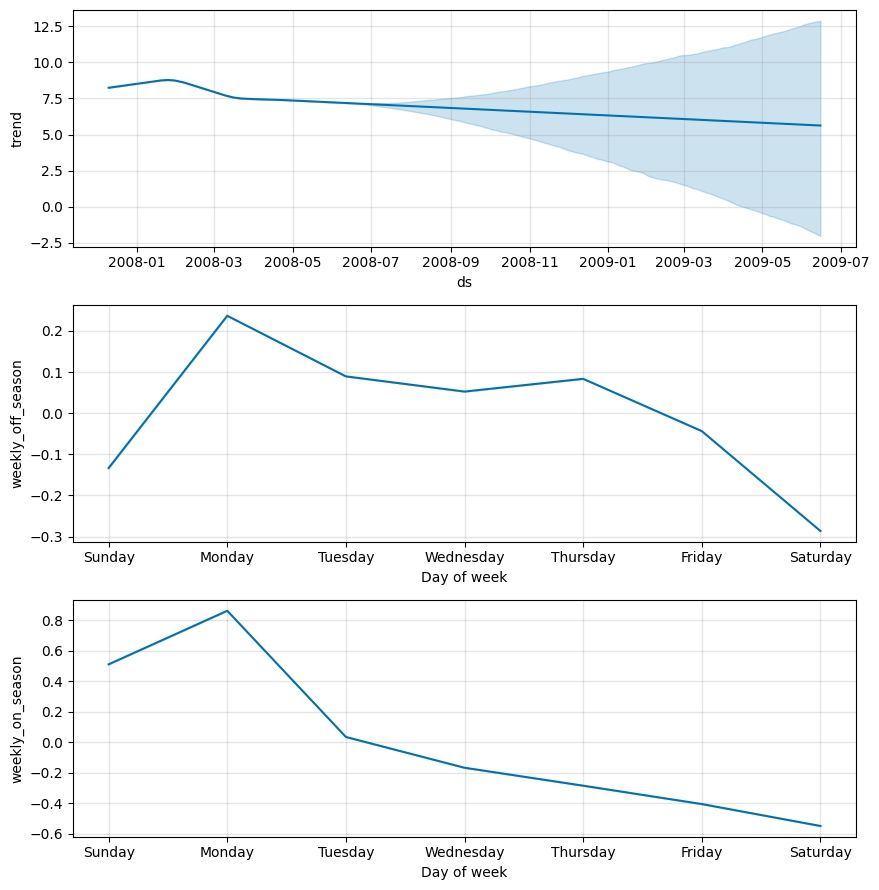

In [ ]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season)
df['off_season'] = ~df['ds'].apply(is_nfl_season)

m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')

future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

In [ ]:
m = Prophet()
m.add_seasonality(
    name='weekly', period=7, fourier_order=3, prior_scale=0.1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/xrximjh9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/xwynf4pb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99383', 'data', 'file=/tmp/tmphtfih07z/xrximjh9.json', 'init=/tmp/tmphtfih07z/xwynf4pb.json', 'output', 'file=/tmp/tmphtfih07z/prophet_modelx2xaewuk/prophet_model-20241021132822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:28:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:28:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


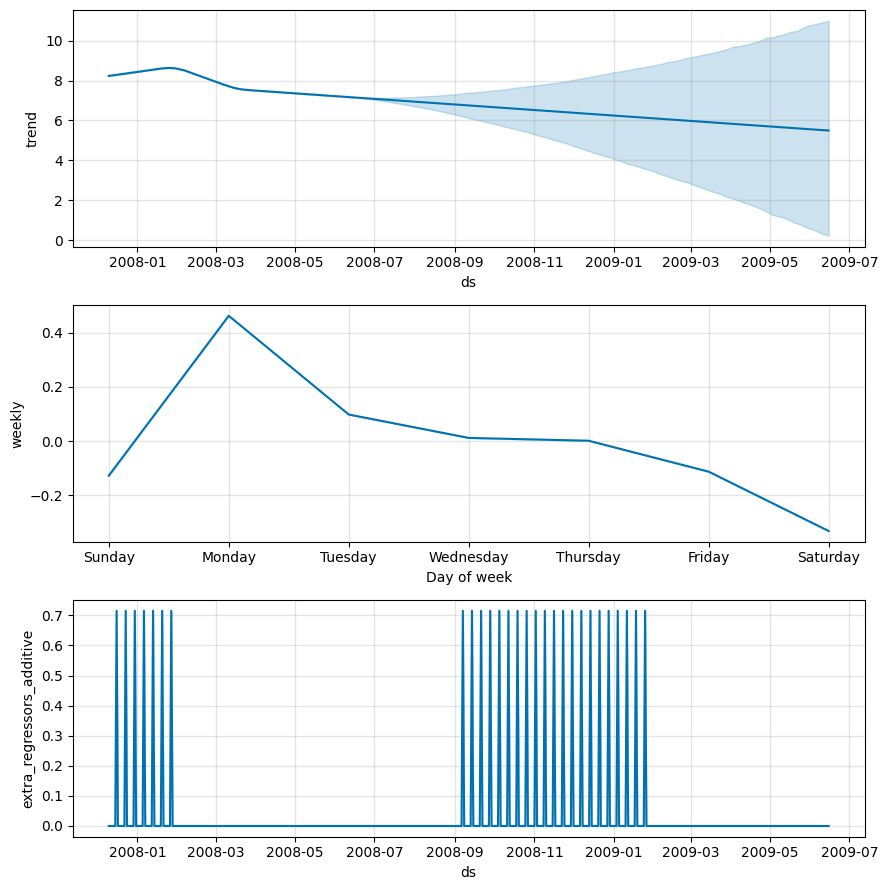

In [ ]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)
fig = m.plot_components(forecast)

In [ ]:
df['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/wd1k4p3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtfih07z/709d6qok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88303', 'data', 'file=/tmp/tmphtfih07z/wd1k4p3d.json', 'init=/tmp/tmphtfih07z/709d6qok.json', 'output', 'file=/tmp/tmphtfih07z/prophet_modelu9y7rdvg/prophet_model-20241021133140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:31:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:31:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


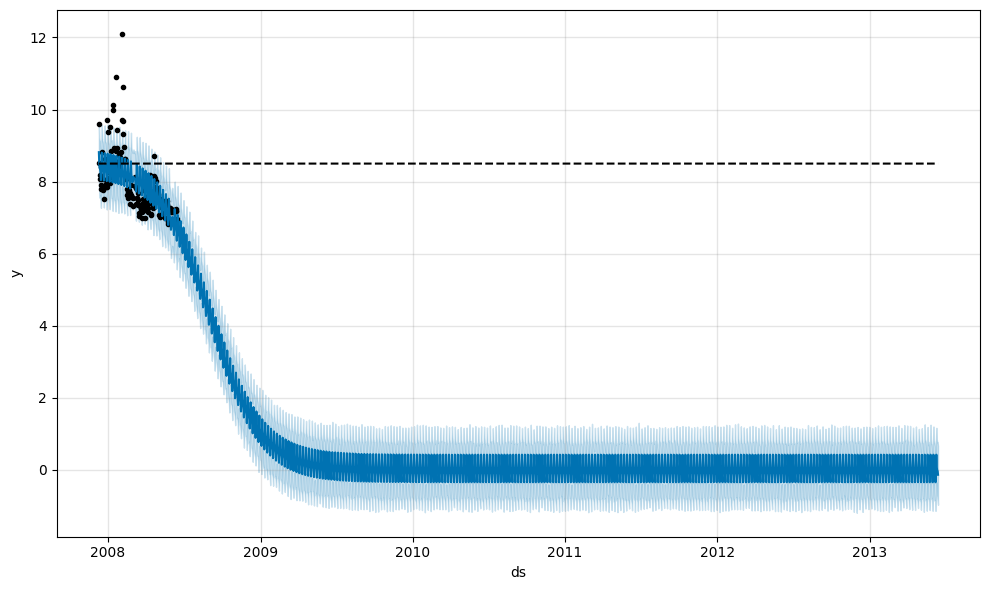

In [ ]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

# Start

In [7]:
# install full version
!pip install pycaret[full]

In [2]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [4]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.8320
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0590
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0380
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.4150
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0350
catboost,CatBoost Classifier,0.7410,0.7993,0.5278,0.6630,0.5851,0.4005,0.4078,2.3990
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1970
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1450
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.2120
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0420


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [5]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [6]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Start from Here

In [46]:
import pandas as pd
from pycaret.time_series import *

# Load the data from a CSV file
df = pd.read_csv('/content/MIOD.csv')

# Select only the 'Dateofbill' and 'Quantity' columns
df = df[['Dateofbill', 'Quantity']]

# Convert the 'Dateofbill' column to datetime format
df['Dateofbill'] = pd.to_datetime(df['Dateofbill'])

# Check for missing values and drop if any
df.dropna(inplace=True)

# Ensure 'y' is a numeric type
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Drop any rows where 'y' could not be converted to numeric
df.dropna(subset=['Quantity'], inplace=True)

# Display the cleaned DataFrame
print(df)

      Dateofbill  Quantity
0     2022-01-06         1
1     2022-07-23         1
2     2022-06-23         1
3     2022-03-17         2
4     2022-12-21         1
...          ...       ...
14213 2022-06-19         3
14214 2022-02-24         2
14215 2022-06-27         4
14216 2022-07-30         1
14217 2022-10-24         3

[14218 rows x 2 columns]


In [47]:
df.isnull().sum()

,0
Dateofbill,0
Quantity,0


In [48]:
df.duplicated().sum()

11646

In [49]:
df.drop_duplicates(inplace=True)
df.shape

(2572, 2)

In [50]:
df.dtypes

,0
Dateofbill,datetime64[ns]
Quantity,int64


In [51]:
# Step 2: Set 'Dateofbill' as the index (required for time series models)
df.set_index('Dateofbill', inplace=True)

In [52]:
df.head()

,Quantity
Dateofbill,
2022-01-06,1
2022-07-23,1
2022-06-23,1
2022-03-17,2
2022-12-21,1


In [54]:
# Step 1: Check for duplicates in the index
duplicates = df.index.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 2207


In [55]:
# Step 2: Remove the duplicates (keeping the first occurrence)
df = df[~df.index.duplicated(keep='first')]

In [56]:
# Step 1: Check for duplicates in the index
duplicates = df.index.duplicated()
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 0


In [57]:
df.shape

(365, 1)

In [58]:
df.head()

,Quantity
Dateofbill,
2022-01-06,1
2022-07-23,1
2022-06-23,1
2022-03-17,2
2022-12-21,1


In [63]:
# Set the frequency of the index (e.g., 'M' for monthly, 'D' for daily)
df = df.asfreq('M')

In [67]:
# Set up the PyCaret environment for Time Series Forecasting
exp_forecast = setup(data=df, target='Quantity', session_id=123, fold=1, fh=1, seasonal_period='M',
                     numeric_imputation_exogenous='mean')

# Get the list of all models
models_list = exp_forecast.models()

# Initialize a list to collect results
results_list = []

# Loop through each model, train it, and print results
for model in models_list.index:
    try:
        # Train the model
        print(f"\nResults for Model: {model}")
        trained_model = create_model(model)

        # Evaluate the model
        model_results = pull()

    except Exception as e:
        print(f"Error training model {model}: {e}")

,Description,Value
0,session_id,123
1,Target,Quantity
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(12, 1)"
5,Transformed data shape,"(12, 1)"
6,Transformed train set shape,"(11, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter



Results for Model: naive


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,3.0000,1.0000,1.0000,1.0000,4503599627370496.0000,2.0000
Mean,NaT,3.0000,1.0000,1.0000,1.0000,4503599627370496.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: grand_means


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,3.9000,1.3000,1.3000,1.3000,5854679515581645.0000,2.0000
Mean,NaT,3.9000,1.3000,1.3000,1.3000,5854679515581645.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: polytrend


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,1.2000,0.4000,0.4000,0.4000,1801439850947712.0000,2.0000
Mean,NaT,1.2000,0.4000,0.4000,0.4000,1801439850947712.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: arima


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,3.9159,1.3053,1.3053,1.3053,5878531029645424.0000,2.0000
Mean,NaT,3.9159,1.3053,1.3053,1.3053,5878531029645424.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: auto_arima


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,3.9000,1.3000,1.3000,1.3000,5854679509311520.0000,2.0000
Mean,NaT,3.9000,1.3000,1.3000,1.3000,5854679509311520.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: exp_smooth


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,1.1993,0.3998,0.3998,0.3998,1800350292713271.2500,2.0000
Mean,NaT,1.1993,0.3998,0.3998,0.3998,1800350292713271.2500,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: ets


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,1.1999,0.4000,0.4000,0.4000,1801313253575292.5000,2.0000
Mean,NaT,1.1999,0.4000,0.4000,0.4000,1801313253575292.5000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: theta


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,1.2000,0.4000,0.4000,0.4000,1801440049604304.5000,2.0000
Mean,NaT,1.2000,0.4000,0.4000,0.4000,1801440049604304.5000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: croston


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,6.4868,2.1623,2.1623,2.1623,9737959937058788.0000,2.0000
Mean,NaT,6.4868,2.1623,2.1623,2.1623,9737959937058788.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: bats


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,3.4374,1.1458,1.1458,1.1458,5160286748767638.0000,2.0000
Mean,NaT,3.4374,1.1458,1.1458,1.1458,5160286748767638.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: tbats


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,3.4374,1.1458,1.1458,1.1458,5160286748767638.0000,2.0000
Mean,NaT,3.4374,1.1458,1.1458,1.1458,5160286748767638.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: prophet


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:15:29
Status,. . . . . . . . . . . . . . . . . .,Fitting 1 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Prophet


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Error training model prophet: y_test indices do not match y_pred_indices or split/prediction length does not match forecast horizon.



Results for Model: lr_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,0.4540,0.1513,0.1513,0.1513,681569210195508.0000,2.0000
Mean,NaT,0.4540,0.1513,0.1513,0.1513,681569210195508.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: en_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,0.5455,0.1818,0.1818,0.1818,818836295885269.3750,2.0000
Mean,NaT,0.5455,0.1818,0.1818,0.1818,818836295885269.3750,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: ridge_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,0.4677,0.1559,0.1559,0.1559,702120209166630.3750,2.0000
Mean,NaT,0.4677,0.1559,0.1559,0.1559,702120209166630.3750,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: lasso_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,0.5455,0.1818,0.1818,0.1818,818836295885269.3750,2.0000
Mean,NaT,0.5455,0.1818,0.1818,0.1818,818836295885269.3750,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: llar_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,0.5455,0.1818,0.1818,0.1818,818836295885269.3750,2.0000
Mean,NaT,0.5455,0.1818,0.1818,0.1818,818836295885269.3750,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: br_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,0.5445,0.1815,0.1815,0.1815,817399539711907.1250,2.0000
Mean,NaT,0.5445,0.1815,0.1815,0.1815,817399539711907.1250,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: huber_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,0.3847,0.1282,0.1282,0.1282,577557917924065.0000,2.0000
Mean,NaT,0.3847,0.1282,0.1282,0.1282,577557917924065.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: omp_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,0.4540,0.1513,0.1513,0.1513,681569210195507.8750,2.0000
Mean,NaT,0.4540,0.1513,0.1513,0.1513,681569210195507.8750,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: knn_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,1.5273,0.5091,0.5091,0.5091,2292741628479360.0000,2.0000
Mean,NaT,1.5273,0.5091,0.5091,0.5091,2292741628479360.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: dt_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,2.5091,0.8364,0.8364,0.8364,3766646961073472.5000,2.0000
Mean,NaT,2.5091,0.8364,0.8364,0.8364,3766646961073472.5000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: rf_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,2.2833,0.7611,0.7611,0.7611,3427648734576820.0000,2.0000
Mean,NaT,2.2833,0.7611,0.7611,0.7611,3427648734576820.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: et_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,2.1949,0.7316,0.7316,0.7316,3294997254643361.0000,2.0000
Mean,NaT,2.1949,0.7316,0.7316,0.7316,3294997254643361.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: gbr_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,2.5090,0.8363,0.8363,0.8363,3766499066066165.0000,2.0000
Mean,NaT,2.5090,0.8363,0.8363,0.8363,3766499066066165.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: ada_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,2.0182,0.6727,0.6727,0.6727,3029694294776384.0000,2.0000
Mean,NaT,2.0182,0.6727,0.6727,0.6727,3029694294776384.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: xgboost_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,2.5043,0.8348,0.8348,0.8348,3759458398659712.0000,2.0000
Mean,NaT,2.5043,0.8348,0.8348,0.8348,3759458398659712.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: lightgbm_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,0.5455,0.1818,0.1818,0.1818,818836304629546.6250,2.0000
Mean,NaT,0.5455,0.1818,0.1818,0.1818,818836304629546.6250,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: catboost_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-10,2.4955,0.8318,0.8318,0.8318,3746305102156582.0000,2.0000
Mean,NaT,2.4955,0.8318,0.8318,0.8318,3746305102156582.0000,2.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(df, fh = 1, session_id = 123)

# Final Code

In [60]:
# Load the dataset
data = get_data('airline', verbose=False)

# Display the cleaned DataFrame
print(data)

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64


In [62]:
df.head()

,Quantity
Dateofbill,
2022-01-06,1
2022-07-23,1
2022-06-23,1
2022-03-17,2
2022-12-21,1


In [61]:
df.dtypes

,0
Quantity,int64


In [22]:
import pandas as pd
from pycaret.time_series import *
from pycaret.datasets import get_data

# Load the dataset
data = get_data('airline', verbose=False)

# Display the cleaned DataFrame
print(data)

# Set up the PyCaret environment for Time Series Forecasting
exp_forecast = setup(data=data, session_id=123, fold=5, fh=12, seasonal_period='M',
                     numeric_imputation_exogenous='mean')

# Get the list of all models
models_list = exp_forecast.models()

# Loop through each model, train it, and print results
for model in models_list.index:
    try:
        # Train the model
        print(f"\nResults for Model: {model}")
        trained_model = create_model(model)

        # Evaluate the model
        model_results = pull()

        # # Add model name to results
        # model_results['Model'] = model

        # # Print model results
        # print(f"\nResults for Model: {model}")
        # print(model_results)

    except Exception as e:
        print(f"Error training model {model}: {e}")

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64


,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter



Results for Model: naive


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,2.3896,2.6353,55.0000,68.2117,0.1782,0.2038,-1.8583
1,1955-12,1.9324,2.2547,51.5833,68.0067,0.1424,0.1605,-1.2025
2,1956-12,2.1716,2.5501,63.4167,83.4740,0.1549,0.1766,-1.2681
3,1957-12,1.7118,2.2514,52.3333,76.4341,0.1205,0.1351,-0.5305
4,1958-12,3.1964,3.4821,91.3333,113.1886,0.1954,0.2259,-1.8662
Mean,NaT,2.2803,2.6347,62.7333,81.8630,0.1583,0.1804,-1.3451
SD,NaT,0.5113,0.4509,14.9045,16.6836,0.0263,0.0319,0.4949


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: grand_means


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,4.3923,4.2053,101.0972,108.8507,0.3436,0.4218,-6.2787
1,1955-12,4.9038,4.5982,130.9048,138.6936,0.3877,0.4872,-8.1606
2,1956-12,5.2978,5.0205,154.7083,164.3373,0.4075,0.5188,-7.7910
3,1957-12,4.9096,4.7812,150.1019,162.3198,0.3795,0.4763,-5.9024
4,1958-12,6.3843,5.9770,182.4250,194.2904,0.4129,0.5276,-7.4451
Mean,NaT,5.1776,4.9165,143.8474,153.6984,0.3862,0.4863,-7.1156
SD,NaT,0.6684,0.5935,26.9830,28.5366,0.0246,0.0375,0.8751


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: snaive


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,1.9587,1.7741,45.0833,45.9211,0.1584,0.1723,-0.2954
1,1955-12,1.6576,1.4980,44.2500,45.1839,0.1349,0.1449,0.0277
2,1956-12,1.3755,1.2671,40.1667,41.4749,0.1076,0.1138,0.4401
3,1957-12,0.4116,0.5011,12.5833,17.0123,0.0314,0.0322,0.9242
4,1958-12,1.6565,1.5152,47.3333,49.2544,0.1106,0.1176,0.4573
Mean,NaT,1.4120,1.3111,37.8833,39.7693,0.1086,0.1162,0.3108
SD,NaT,0.5331,0.4357,12.8606,11.6441,0.0428,0.0470,0.4152


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: polytrend


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,1.3217,1.6530,30.4218,42.7866,0.0991,0.1053,-0.1246
1,1955-12,1.4535,1.7638,38.7991,53.1992,0.1079,0.1168,-0.3478
2,1956-12,1.5689,1.8805,45.8148,61.5551,0.1140,0.1226,-0.2334
3,1957-12,1.6352,1.8060,49.9929,61.3138,0.1275,0.1278,0.0151
4,1958-12,1.7527,2.0741,50.0825,67.4208,0.1096,0.1144,-0.0169
Mean,NaT,1.5464,1.8355,43.0222,57.2551,0.1116,0.1174,-0.1415
SD,NaT,0.1484,0.1402,7.5212,8.5334,0.0093,0.0076,0.1352


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: arima


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.9585,0.9248,22.0607,23.9364,0.0755,0.0788,0.6480
1,1955-12,0.4635,0.5110,12.3739,15.4126,0.0352,0.0361,0.8869
2,1956-12,0.4462,0.4933,13.0286,16.1485,0.0327,0.0334,0.9151
3,1957-12,0.5983,0.5993,18.2920,20.3442,0.0506,0.0491,0.8916
4,1958-12,1.0044,0.9280,28.6999,30.1669,0.0671,0.0697,0.7964
Mean,NaT,0.6942,0.6913,18.8911,21.2017,0.0522,0.0534,0.8276
SD,NaT,0.2408,0.1953,6.0574,5.4339,0.0169,0.0180,0.0985


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: auto_arima


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8071,0.8710,18.5757,22.5446,0.0617,0.0644,0.6878
1,1955-12,0.6572,0.6976,17.5425,21.0400,0.0500,0.0517,0.7892
2,1956-12,0.4136,0.4827,12.0769,15.8014,0.0298,0.0305,0.9187
3,1957-12,0.6349,0.6333,19.4102,21.4989,0.0538,0.0520,0.8789
4,1958-12,1.1060,1.0182,31.6020,33.0981,0.0738,0.0769,0.7549
Mean,NaT,0.7237,0.7405,19.8414,22.7966,0.0538,0.0551,0.8059
SD,NaT,0.2287,0.1865,6.4136,5.6548,0.0145,0.0154,0.0835


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: exp_smooth


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8451,0.8970,19.4508,23.2182,0.0649,0.0677,0.6688
1,1955-12,0.3745,0.4284,9.9970,12.9209,0.0282,0.0288,0.9205
2,1956-12,0.4986,0.5736,14.5613,18.7758,0.0366,0.0376,0.8852
3,1957-12,0.5495,0.5693,16.8009,19.3269,0.0458,0.0447,0.9021
4,1958-12,0.7075,0.6887,20.2155,22.3873,0.0479,0.0494,0.8879
Mean,NaT,0.5950,0.6314,16.2051,19.3258,0.0447,0.0456,0.8529
SD,NaT,0.1644,0.1564,3.6936,3.6290,0.0123,0.0130,0.0929


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: ets


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8453,0.8972,19.4550,23.2225,0.0649,0.0678,0.6687
1,1955-12,0.3744,0.4283,9.9946,12.9184,0.0282,0.0288,0.9205
2,1956-12,0.4985,0.5735,14.5582,18.7725,0.0366,0.0376,0.8853
3,1957-12,0.5495,0.5693,16.8005,19.3265,0.0458,0.0447,0.9021
4,1958-12,0.7311,0.7208,20.8906,23.4315,0.0495,0.0512,0.8772
Mean,NaT,0.5998,0.6378,16.3398,19.5343,0.0450,0.0460,0.8508
SD,NaT,0.1680,0.1593,3.8487,3.8258,0.0124,0.0132,0.0922


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: theta


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,1.0854,1.1466,24.9831,29.6794,0.0835,0.0884,0.4589
1,1955-12,0.6218,0.6709,16.5987,20.2355,0.0476,0.0491,0.8050
2,1956-12,0.7998,0.8736,23.3572,28.5971,0.0594,0.0619,0.7338
3,1957-12,0.5263,0.6171,16.0904,20.9512,0.0401,0.0401,0.8850
4,1958-12,1.5927,1.6010,45.5099,52.0433,0.1013,0.1080,0.3941
Mean,NaT,0.9252,0.9819,25.3079,30.3013,0.0664,0.0695,0.6553
SD,NaT,0.3842,0.3611,10.7037,11.5304,0.0228,0.0252,0.1940


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: stlf


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.9463,0.9494,21.7813,24.5735,0.0739,0.0772,0.6290
1,1955-12,0.3455,0.4169,9.2216,12.5741,0.0256,0.0261,0.9247
2,1956-12,0.3671,0.4360,10.7188,14.2701,0.0269,0.0274,0.9337
3,1957-12,0.8141,0.7742,24.8886,26.2835,0.0690,0.0663,0.8190
4,1958-12,0.9587,0.9076,27.3947,29.5032,0.0631,0.0655,0.8053
Mean,NaT,0.6863,0.6968,18.8010,21.4409,0.0517,0.0525,0.8224
SD,NaT,0.2743,0.2283,7.4415,6.7573,0.0210,0.0214,0.1100


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: croston


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,2.2188,2.5144,51.0684,65.0832,0.1641,0.1870,-1.6021
1,1955-12,2.1318,2.4205,56.9062,73.0092,0.1581,0.1796,-1.5384
2,1956-12,2.0191,2.4013,58.9627,78.6038,0.1438,0.1625,-1.0112
3,1957-12,1.5233,1.9911,46.5707,67.5963,0.1095,0.1186,-0.1970
4,1958-12,2.2510,2.6628,64.3204,86.5566,0.1352,0.1506,-0.6761
Mean,NaT,2.0288,2.3980,55.5657,74.1698,0.1421,0.1597,-1.0050
SD,NaT,0.2652,0.2235,6.1825,7.7488,0.0193,0.0242,0.5296


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: bats


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,1.4966,1.5073,34.4479,39.0149,0.1167,0.1256,0.0649
1,1955-12,0.3677,0.3699,9.8159,11.1582,0.0307,0.0302,0.9407
2,1956-12,0.3969,0.4495,11.5918,14.7144,0.0295,0.0298,0.9295
3,1957-12,0.6208,0.7301,18.9803,24.7864,0.0463,0.0470,0.8391
4,1958-12,1.8650,1.8500,53.2904,60.1373,0.1194,0.1286,0.1909
Mean,NaT,0.9494,0.9814,25.6253,29.9622,0.0685,0.0723,0.5930
SD,NaT,0.6147,0.5918,16.3354,17.9185,0.0409,0.0452,0.3835


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: tbats


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.7164,0.7452,16.4901,19.2884,0.0551,0.0569,0.7715
1,1955-12,0.3803,0.3840,10.1516,11.5835,0.0322,0.0316,0.9361
2,1956-12,0.3751,0.4464,10.9542,14.6135,0.0276,0.0279,0.9305
3,1957-12,0.7864,0.8136,24.0440,27.6204,0.0673,0.0645,0.8001
4,1958-12,1.2815,1.3308,36.6166,43.2599,0.0809,0.0854,0.5813
Mean,NaT,0.7080,0.7440,19.6513,23.2731,0.0526,0.0533,0.8039
SD,NaT,0.3327,0.3368,9.8285,11.3656,0.0203,0.0214,0.1297


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: prophet


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.9222,1.1156,21.2253,28.8767,0.0673,0.0713,0.4877
1,1955-12,0.7506,0.9377,20.0358,28.2826,0.0554,0.0578,0.6191
2,1956-12,0.8016,0.8848,23.4076,28.9635,0.0612,0.0618,0.7269
3,1957-12,1.3208,1.2813,40.3811,43.4985,0.1123,0.1060,0.5043
4,1958-12,0.9340,1.0520,26.6888,34.1972,0.0605,0.0607,0.7384
Mean,NaT,0.9458,1.0543,26.3477,32.7637,0.0713,0.0715,0.6153
SD,NaT,0.2001,0.1397,7.3726,5.7779,0.0208,0.0178,0.1060


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfql9ph_o/0qf9jpgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfql9ph_o/vu3tovoi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81970', 'data', 'file=/tmp/tmpfql9ph_o/0qf9jpgq.json', 'init=/tmp/tmpfql9ph_o/vu3tovoi.json', 'output', 'file=/tmp/tmpfql9ph_o/prophet_modelibvx140_/prophet_model-20241022104255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing



Results for Model: lr_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8340,0.9964,19.1948,25.7917,0.0618,0.0650,0.5914
1,1955-12,1.1569,1.2543,30.8835,37.8314,0.0880,0.0935,0.3184
2,1956-12,0.7137,0.8440,20.8412,27.6262,0.0513,0.0533,0.7516
3,1957-12,0.6678,0.7038,20.4172,23.8918,0.0557,0.0539,0.8505
4,1958-12,0.7198,0.7630,20.5669,24.8024,0.0457,0.0471,0.8624
Mean,NaT,0.8184,0.9123,22.3807,27.9887,0.0605,0.0626,0.6748
SD,NaT,0.1779,0.1972,4.2887,5.0749,0.0147,0.0165,0.2029


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: en_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8323,0.9980,19.1565,25.8327,0.0615,0.0647,0.5901
1,1955-12,1.1561,1.2528,30.8622,37.7865,0.0878,0.0934,0.3200
2,1956-12,0.7159,0.8474,20.9068,27.7375,0.0514,0.0535,0.7496
3,1957-12,0.6694,0.7054,20.4645,23.9485,0.0558,0.0540,0.8497
4,1958-12,0.7235,0.7667,20.6734,24.9227,0.0459,0.0473,0.8610
Mean,NaT,0.8194,0.9141,22.4127,28.0456,0.0605,0.0626,0.6741
SD,NaT,0.1766,0.1957,4.2682,5.0282,0.0146,0.0164,0.2019


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: ridge_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8339,0.9965,19.1947,25.7922,0.0618,0.0650,0.5913
1,1955-12,1.1569,1.2543,30.8841,37.8315,0.0880,0.0935,0.3184
2,1956-12,0.7137,0.8440,20.8416,27.6268,0.0513,0.0533,0.7516
3,1957-12,0.6678,0.7038,20.4173,23.8919,0.0557,0.0539,0.8505
4,1958-12,0.7198,0.7630,20.5671,24.8027,0.0457,0.0471,0.8624
Mean,NaT,0.8184,0.9123,22.3809,27.9890,0.0605,0.0626,0.6748
SD,NaT,0.1779,0.1972,4.2888,5.0748,0.0147,0.0165,0.2029


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: lasso_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8374,0.9958,19.2744,25.7749,0.0619,0.0652,0.5919
1,1955-12,1.1539,1.2510,30.8029,37.7344,0.0876,0.0931,0.3219
2,1956-12,0.7170,0.8490,20.9395,27.7911,0.0515,0.0536,0.7486
3,1957-12,0.6708,0.7068,20.5098,23.9953,0.0559,0.0541,0.8492
4,1958-12,0.7266,0.7696,20.7624,25.0152,0.0461,0.0475,0.8600
Mean,NaT,0.8212,0.9144,22.4578,28.0622,0.0606,0.0627,0.6743
SD,NaT,0.1751,0.1941,4.2130,4.9936,0.0145,0.0162,0.2008


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: llar_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8374,0.9958,19.2748,25.7743,0.0619,0.0652,0.5919
1,1955-12,1.1539,1.2510,30.8030,37.7345,0.0876,0.0931,0.3219
2,1956-12,0.7170,0.8490,20.9394,27.7917,0.0515,0.0536,0.7486
3,1957-12,0.6709,0.7068,20.5102,23.9968,0.0559,0.0541,0.8491
4,1958-12,0.7265,0.7695,20.7602,25.0142,0.0461,0.0475,0.8600
Mean,NaT,0.8212,0.9144,22.4575,28.0623,0.0606,0.0627,0.6743
SD,NaT,0.1751,0.1941,4.2132,4.9936,0.0145,0.0162,0.2008


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: br_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8407,1.0133,19.3509,26.2274,0.0618,0.0651,0.5774
1,1955-12,1.1791,1.2608,31.4747,38.0295,0.0899,0.0956,0.3113
2,1956-12,0.7374,0.8718,21.5340,28.5366,0.0529,0.0551,0.7349
3,1957-12,0.6684,0.7040,20.4350,23.9012,0.0556,0.0539,0.8503
4,1958-12,0.7278,0.7753,20.7948,25.2006,0.0460,0.0474,0.8579
Mean,NaT,0.8307,0.9250,22.7179,28.3791,0.0613,0.0634,0.6664
SD,NaT,0.1828,0.1973,4.4346,5.0584,0.0152,0.0170,0.2046


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: huber_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8578,1.0652,19.7443,27.5706,0.0625,0.0661,0.5330
1,1955-12,1.2069,1.2950,32.2164,39.0591,0.0915,0.0975,0.2735
2,1956-12,0.7475,0.9008,21.8296,29.4875,0.0534,0.0557,0.7170
3,1957-12,0.6159,0.6823,18.8310,23.1644,0.0510,0.0495,0.8594
4,1958-12,0.6803,0.7768,19.4395,25.2492,0.0428,0.0444,0.8574
Mean,NaT,0.8217,0.9440,22.4121,28.9062,0.0603,0.0626,0.6481
SD,NaT,0.2086,0.2173,5.0048,5.5054,0.0169,0.0189,0.2222


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: omp_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8883,1.0856,20.4464,28.0992,0.0649,0.0686,0.5150
1,1955-12,1.0088,1.2056,26.9289,36.3650,0.0739,0.0787,0.3702
2,1956-12,1.0624,1.3042,31.0236,42.6904,0.0750,0.0801,0.4068
3,1957-12,0.8652,1.0429,26.4513,35.4053,0.0652,0.0662,0.6716
4,1958-12,1.0994,1.3641,31.4134,44.3405,0.0653,0.0691,0.5601
Mean,NaT,0.9848,1.2005,27.2527,37.3801,0.0689,0.0725,0.5047
SD,NaT,0.0931,0.1229,3.9650,5.7916,0.0046,0.0057,0.1084


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: knn_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.9208,1.1164,21.1928,28.8973,0.0674,0.0712,0.4870
1,1955-12,1.3606,1.4976,36.3198,45.1708,0.1027,0.1106,0.0283
2,1956-12,0.8983,1.0466,26.2331,34.2574,0.0644,0.0677,0.6180
3,1957-12,0.7620,0.7796,23.2978,26.4661,0.0615,0.0600,0.8165
4,1958-12,0.4883,0.6210,13.9529,20.1866,0.0304,0.0310,0.9088
Mean,NaT,0.8860,1.0122,24.1993,30.9956,0.0653,0.0681,0.5717
SD,NaT,0.2829,0.3016,7.2922,8.4063,0.0230,0.0255,0.3092


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: dt_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.9486,0.9335,21.8339,24.1628,0.0755,0.0791,0.6413
1,1955-12,0.7717,0.9475,20.6012,28.5780,0.0574,0.0604,0.6111
2,1956-12,1.1230,1.3282,32.7934,43.4757,0.0804,0.0857,0.3847
3,1957-12,0.6665,0.7221,20.3768,24.5132,0.0576,0.0552,0.8426
4,1958-12,1.3393,1.6177,38.2697,52.5847,0.0796,0.0852,0.3814
Mean,NaT,0.9698,1.1098,26.7750,34.6629,0.0701,0.0731,0.5722
SD,NaT,0.2415,0.3204,7.3731,11.3943,0.0104,0.0128,0.1738


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: rf_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.9267,1.0488,21.3284,27.1469,0.0693,0.0729,0.5473
1,1955-12,1.0018,1.1444,26.7423,34.5169,0.0746,0.0789,0.4326
2,1956-12,0.7990,0.9564,23.3329,31.3054,0.0571,0.0598,0.6810
3,1957-12,0.8705,0.8971,26.6130,30.4558,0.0723,0.0695,0.7570
4,1958-12,0.8515,1.0021,24.3320,32.5744,0.0518,0.0538,0.7626
Mean,NaT,0.8899,1.0097,24.4697,31.1999,0.0650,0.0670,0.6361
SD,NaT,0.0693,0.0840,2.0463,2.4447,0.0090,0.0091,0.1280


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: et_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.9225,1.0241,21.2340,26.5081,0.0694,0.0728,0.5683
1,1955-12,1.4416,1.5960,38.4817,48.1389,0.1083,0.1173,-0.1036
2,1956-12,0.5373,0.6127,15.6903,20.0561,0.0395,0.0406,0.8691
3,1957-12,0.7312,0.7659,22.3547,26.0017,0.0617,0.0593,0.8229
4,1958-12,0.7210,0.8154,20.6032,26.5065,0.0447,0.0460,0.8428
Mean,NaT,0.8707,0.9628,23.6728,29.4423,0.0647,0.0672,0.5999
SD,NaT,0.3104,0.3429,7.7476,9.6616,0.0244,0.0274,0.3680


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: gbr_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8976,0.9981,20.6602,25.8338,0.0682,0.0717,0.5900
1,1955-12,1.4364,1.6177,38.3440,48.7936,0.1077,0.1169,-0.1338
2,1956-12,0.7450,0.9856,21.7545,32.2605,0.0522,0.0550,0.6612
3,1957-12,0.7712,0.8011,23.5780,27.1980,0.0655,0.0628,0.8062
4,1958-12,0.9599,1.1652,27.4279,37.8746,0.0574,0.0603,0.6791
Mean,NaT,0.9620,1.1135,26.3529,34.3921,0.0702,0.0733,0.5205
SD,NaT,0.2501,0.2772,6.4217,8.3555,0.0196,0.0224,0.3345


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: ada_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.9492,1.0887,21.8483,28.1808,0.0707,0.0745,0.5121
1,1955-12,1.0270,1.1658,27.4164,35.1649,0.0766,0.0811,0.4111
2,1956-12,0.9761,1.1922,28.5030,39.0258,0.0691,0.0733,0.5042
3,1957-12,0.7387,0.8061,22.5830,27.3658,0.0586,0.0579,0.8038
4,1958-12,0.7711,0.9154,22.0333,29.7574,0.0469,0.0485,0.8019
Mean,NaT,0.8924,1.0337,24.4768,31.8989,0.0644,0.0671,0.6066
SD,NaT,0.1155,0.1493,2.8746,4.4815,0.0105,0.0120,0.1641


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: xgboost_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,1.1205,1.2160,25.7904,31.4758,0.0845,0.0895,0.3914
1,1955-12,1.4686,1.6865,39.2030,50.8685,0.1097,0.1197,-0.2323
2,1956-12,0.8604,1.0797,25.1256,35.3421,0.0606,0.0640,0.5934
3,1957-12,0.9769,1.0578,29.8681,35.9114,0.0762,0.0755,0.6622
4,1958-12,0.5945,0.7910,16.9873,25.7119,0.0363,0.0374,0.8521
Mean,NaT,1.0042,1.1662,27.3949,35.8619,0.0734,0.0772,0.4534
SD,NaT,0.2893,0.2943,7.2331,8.3394,0.0244,0.0273,0.3731


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: lightgbm_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.9254,1.0721,21.2999,27.7509,0.0686,0.0723,0.5269
1,1955-12,1.2902,1.4639,34.4419,44.1538,0.0961,0.1034,0.0716
2,1956-12,0.7545,0.9171,22.0339,30.0192,0.0538,0.0562,0.7067
3,1957-12,0.8044,0.8105,24.5938,27.5155,0.0646,0.0634,0.8017
4,1958-12,0.8880,1.0076,25.3731,32.7521,0.0543,0.0565,0.7600
Mean,NaT,0.9325,1.0542,25.5485,32.4383,0.0675,0.0704,0.5734
SD,NaT,0.1887,0.2229,4.6997,6.1548,0.0154,0.0175,0.2678


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


Results for Model: catboost_cds_dt


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1954-12,0.8250,0.9852,18.9885,25.4998,0.0606,0.0637,0.6005
1,1955-12,1.2812,1.4556,34.2014,43.9052,0.0957,0.1031,0.0820
2,1956-12,0.5769,0.7075,16.8468,23.1585,0.0411,0.0425,0.8254
3,1957-12,0.7283,0.7409,22.2655,25.1518,0.0605,0.0585,0.8343
4,1958-12,0.8267,0.9956,23.6213,32.3619,0.0499,0.0518,0.7657
Mean,NaT,0.8476,0.9769,23.1847,30.0154,0.0616,0.0639,0.6216
SD,NaT,0.2352,0.2675,6.0030,7.6092,0.0186,0.0208,0.2825


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
data.shape

(144,)